<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

# Práctica 2 – Exploración de Redes


En el año 2018, Quinten Dol sugirió a los usuarios de Twitter seguir a estas celebridades de la Tecnologia local:

In [2]:
from IPython.display import IFrame
IFrame('https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow', 800, 350)

Aunque proponía 50 _influencers_, sólo hay 46 activos en X (antes Twitter). Se construyó una red para ver si entre ellos se seguían, y esto tenemos:

In [3]:
IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vQaaNQb2frjnlt0fPSBQhp5tNydB0a9ibp98sblBn6OfvGd8vsx8cfHb4w8Cm_qC3EIeYFby_zNQBoK/pubhtml', 800, 350)

<div class="alert alert-info" role="alert">
    
## Data para la sesión

Para esta sesión, los datos del archivo **SeattleTop** puedes descargarlos en _tu_ carpeta **data** desde este [enlace](https://drive.google.com/drive/folders/1QXy0RwgNUBryirnVx0-_-rfr3WZxSld5?usp=sharing).
</div>



# Exploración Básica de la red

Como ya sabemos, la red se arma con la **adjacency matrix** o la **edgelist**. Hagámoslo nuevamente:

In [4]:
# librerias necesarias
import networkx as nx
import pandas as pd

# link a GoogleDrive como un Excel
linkGoogle="https://docs.google.com/spreadsheets/d/e/2PACX-1vQaaNQb2frjnlt0fPSBQhp5tNydB0a9ibp98sblBn6OfvGd8vsx8cfHb4w8Cm_qC3EIeYFby_zNQBoK/pub?output=xlsx"

# leyendo archivo de red
adjacency=pd.read_excel(linkGoogle,   
                        index_col=0,  # la columna '0' guarda los nombres
                        sheet_name='adjacency') # la tabla tiene este nombre

# creando red dirigida
TopFromAdjacency=nx.from_pandas_adjacency(adjacency,create_using=nx.DiGraph)

El objeto **TopFromAdjacency** contiene a la red creada. Esta red es **dirigida** (DiGraph):

In [5]:
type(TopFromAdjacency)

networkx.classes.digraph.DiGraph

¿Tendremos algun _influencer_ que no siga a otro ni sea seguido por otro?

In [6]:
list(nx.isolates(TopFromAdjacency))

[]

De ahi que la red no mostrará nodos aislados:

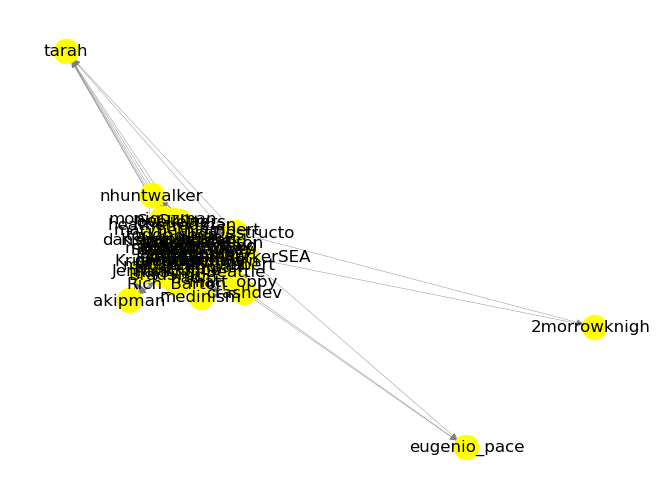

In [7]:
nx.draw(TopFromAdjacency, with_labels=True,edge_color='grey',width=0.3,node_color='yellow')

Por lo general, podemos explorar la red de dos maneras:

1. A nivel de red en total.
2. A nivel de cada actor (nodo).

## Explorando a nivel de red

Recordemos la cantidad de nodos y enlaces de la red.

In [8]:
# nodos , #enlaces
len(TopFromAdjacency.nodes),len(TopFromAdjacency.edges)

(46, 588)

<div class="alert alert-success" role="alert">Red strongly connected 
</div>

Una de las primeras interrogantes, es saber si cada nodo puede conectarse con otro nodo. Para que ello sucede, teniendo en cuenta que la red es dirigida, debe haber un **path** o camino (sequencia de flechas) entre todo par de nodos de la red. Si esto fuera así, se debe verificar que la red es **strongly_connected**.

En la Figura 1 vemos una red que tiene componentes fuertemente conectados, pero la red en su totalidad no lo es:
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/strongly_connected.png" style="width:70%">
<figcaption align = "center"> Figura 1. Red y componentes fuertemente conectados </figcaption>
    <a href="https://en.wikipedia.org/wiki/Strongly_connected_component" class="alert-link">Fuente:Wikipedia</a>
</figure>

Nues

Nuestra red tampoco lo es:

In [9]:
nx.is_strongly_connected(TopFromAdjacency)

False

El resultado anterior indica que hay algunos nodos que no pueden ser alcanzados por otros nodos.

Revisemos tres conceptos clave para entedendera la red:

1. Distancia o **Distance**.
2. Alcanzabilidad o **Reachability**.
2. Densidad o **Density**. 

<div class="alert alert-success" role="alert">Distancia y el Geodésico </div>

La **distance** se entiende como la cantidad de _edges_ que separan un par de nodos. Como entre algun par de nodos puede haber muchas distancias, llamamos **geodésico** a la distancia más corta entre dos nodos. La Figura 2 nos muestra algunos geodésicos:

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/geodesics.png" style="width:70%">
<figcaption align = "center"> Figura 2. Geodésicos. 
 </figcaption>
 <a href="https://www.wolframphysics.org/technical-introduction/limiting-behavior-and-emergent-geometry/geodesics/" class="alert-link">Fuente: Wolframphysics</a>
</figure>

Calculemos todos los gesodésicos de nuestra red:

In [10]:
# calcular los geodesicos para cada nodo
geodesics = dict(nx.all_pairs_shortest_path_length(TopFromAdjacency))

# formatear geodesicos como matriz
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in TopFromAdjacency.nodes] for n in TopFromAdjacency.nodes]

# formatear matriz de geodesicos como dataframe
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=TopFromAdjacency.nodes, columns=TopFromAdjacency.nodes)

#tenemos
MatrixGeo_DF

,rachelerman,mattmcilwain,DaveParkerSEA,toddbishop,ashannstew,LeslieFeinzaig,akipman,matt_oppy,gilbert,juliesandler,...,Jenerationy,lanctot,Kristen_Hammy,nhuntwalker,eugenio_pace,JenMsft,PeterHamilton,sarahstood,mcolacurcio,marybethlambert
rachelerman,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mattmcilwain,2.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,...,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0
DaveParkerSEA,1.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
toddbishop,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
ashannstew,1.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
LeslieFeinzaig,1.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
akipman,2.0,3.0,3.0,2.0,3.0,3.0,0.0,3.0,3.0,3.0,...,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0
matt_oppy,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
gilbert,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,...,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0
juliesandler,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


De la matriz podemos calcular la distribución de frequencias de los geodésicos:

In [11]:
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,46.0
1.0,588.0
2.0,1158.0
3.0,182.0
4.0,7.0
NaN,135.0


La diagonal es cero (hay 46 ceros por ello), pero si alguna fila o columna presenta valores perdidos, nos indica que no hay camino entre esos dos nodos.

Una métrica clave  que podemos calcular de la matriz de geodésicos es el diámetro:

In [12]:
MatrixGeo_DF.max().max()

4.0

El diámetro es la celda de mayor valor, pues representa la distancia mas corta entre las celdas mas alejadas de la red. Veámoslo en la Figura 3.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/diameter.png" style="width:70%">
<figcaption align = "center"> Figura 3. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>


La función **diameter()** no podemos calcularlo de una red dirigida, por lo que debemos calcular los componentes fuertemente conectados:

In [13]:
Seattle_connComp = sorted(nx.strongly_connected_components(TopFromAdjacency), key=len, reverse=False)
Seattle_connComp

[{'tarah'},
 {'2morrowknight'},
 {'eugenio_pace'},
 {'BradSmi',
  'DaveParkerSEA',
  'JenMsft',
  'Jenerationy',
  'KieranSnyder',
  'Kristen_Hammy',
  'LeslieFeinzaig',
  'MissDestructo',
  'PeterHamilton',
  'RajSinghSeattle',
  'Rich_Barton',
  'Ryanintheus',
  'ShaunaCausey',
  'SoGulley',
  'akipman',
  'ashannstew',
  'crashdev',
  'danshapiro',
  'daryn',
  'etzioni',
  'funcOfJoe',
  'gilbert',
  'hadip',
  'heatherredman',
  'jinman',
  'john_gabbert',
  'juliesandler',
  'kirbywinfield',
  'lanctot',
  'lovelletters',
  'marybethlambert',
  'matt_oppy',
  'mattmcilwain',
  'mattmday',
  'mcolacurcio',
  'medinism',
  'moniguzman',
  'nhuntwalker',
  'rachelerman',
  'sarahstood',
  'sonalpmane',
  'stevesi',
  'toddbishop'}]

Ahora sí, calculo el diametro para el último componente:

In [14]:
nx.diameter(TopFromAdjacency.subgraph(Seattle_connComp[3]))

4

<div class="alert alert-success" role="alert">Alcanzabilidad </div>

De la matriz de geodésicos podemos obtener la **reachability matrix**, que nos informa si hay conexión entre nodos:

In [15]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_39026/3592291340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})


,rachelerman,mattmcilwain,DaveParkerSEA,toddbishop,ashannstew,LeslieFeinzaig,akipman,matt_oppy,gilbert,juliesandler,...,Jenerationy,lanctot,Kristen_Hammy,nhuntwalker,eugenio_pace,JenMsft,PeterHamilton,sarahstood,mcolacurcio,marybethlambert
rachelerman,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mattmcilwain,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DaveParkerSEA,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
toddbishop,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ashannstew,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
LeslieFeinzaig,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
akipman,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
matt_oppy,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
gilbert,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
juliesandler,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


De esta matriz podemos calcular el porcentaje de conexiones existentes (**connectedness**):

In [17]:
nNodes=len(TopFromAdjacency.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

0.9347826086956522

Notese que la fila de _2morrowknight_ está llena de ceros (pero no es la única), déjame mostrarte la **red ego** de este actor (su vecindario de conexiones):

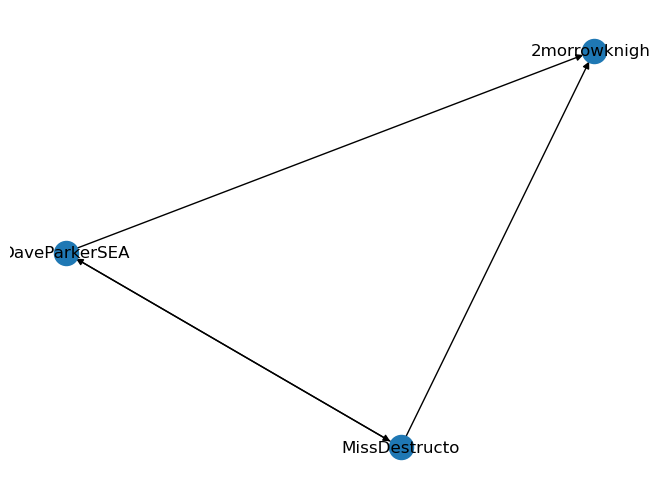

In [16]:
nx.draw(nx.ego_graph(TopFromAdjacency,'2morrowknight',undirected=True),with_labels=True)

Se nota que _2morrowknight_ no tiene flechas que salen (out) de éste. Así, a _2morrowknight_ se le puede alcanzar, pero este no puede alcanzar a otros. Los otros actores los resaltamos aqui:

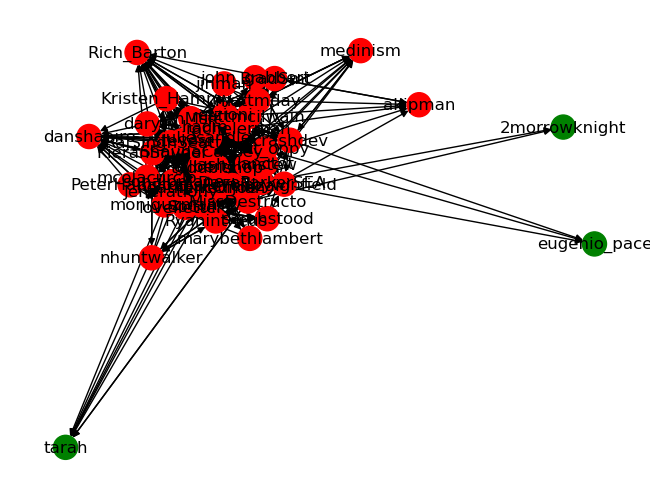

In [17]:
nodesPositions=nx.spring_layout(TopFromAdjacency,k=0.5)
ConnectedComponents =(TopFromAdjacency.subgraph(c).copy() for c in nx.strongly_connected_components(TopFromAdjacency))
color_map = ['red' if node in Seattle_connComp[3] else 'green' for node in TopFromAdjacency.nodes()]
nx.draw(TopFromAdjacency,nodesPositions,node_color=color_map,with_labels=True)

Un concepto que se desprende del _reachability_ es la **reciprocidad**, la proporcion de arcos dirigidos reciprocos, entre todos los arcos dirigidos.

In [18]:
nx.overall_reciprocity(TopFromAdjacency)

0.6632653061224489

La reciprocidad se puede calcular para cada nodo:

In [18]:
pd.DataFrame.from_dict(nx.reciprocity(TopFromAdjacency,nodes=TopFromAdjacency.nodes),orient='index').sort_values(0,ascending=False)

,0
LeslieFeinzaig,0.941176
john_gabbert,0.923077
ShaunaCausey,0.901961
toddbishop,0.828571
daryn,0.823529
MissDestructo,0.820513
juliesandler,0.807692
rachelerman,0.800000
heatherredman,0.800000
etzioni,0.800000


<div class="alert alert-success" role="alert">Densidad </div>

Finalmente, la **densidad** es otro concepto básico a recordar, nos dice que tan cerca está la red de estar completamente conectada, como podemos notar en la Figura 4.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/density.png" style="width:70%">
<figcaption align = "center"> Figura 4. Geodésicos. 
 </figcaption>
 <a href="https://medium.com/@jane.vdplas/https-medium-com-protium-digital-what-are-network-effects-4f1ec159b6">Fuente: Medium</a>
</figure>


La densidad de nuestra red es:

In [20]:
nx.density(TopFromAdjacency)

0.28405797101449276

Hay una relacion muy importante entre density y reachability; son conceptos que NO son sinónimos, como vemos en la Figura 6.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/reachability-and-density.png" style="width:70%">
<figcaption align = "center"> Figura 5. Reachability versus Density. 
 </figcaption>
 <a href="https://www.researchgate.net/publication/42763973_Toward_a_Network_Perspective_of_the_Study_of_Resilience_in_Social-Ecological_Systems">Fuente: Ecology and Society</a>
</figure>


## Explorando a nivel de actor - CENTRALIDAD

Luego de caracterizar a la red, podemos enfocarnos en la relevancia del actor en la red. La relevancia puede entenderse de diferentes maneras, y aqui las más utilizadas:

* Grado o **DEGREE**: Indica la cantidad de conexiones de un nodo, representada en general como un coeficiente, donde 100% (1) indicaría que el nodo se conecta con todos los nodos. Cuando tenemos una red dirigida, se calcula por separado el **IN**DEGREE y el **OUT**DEGREE.
* Cercanía o **CLOSENESS**: Indica que tan cerca está un nodo a todos los demás. Las conexiones de algun nodo le permiten 'llegar' más rápido a los demás que a otros. Es decir, el promedio de sus geodésicos es el menor de todos. Cuando tenemos una red dirigida, se calcula por separado el **IN**CLOSENESS y el **OUT**CLOSENESS.
* Intermediación o **BETWEENNESS**: Indica que tanto es necesario un nodo para que algun nodo llegue a otro nodo. Esta importancia nace también del concepto del geodésico, pues un actor con alto betweenness aparece mucho en los geodésicos de la red,  y en el caso extremo, tiene la capacidad de desconectar a la red.

La Figura 6 ejemplifica estos conceptos.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/centrality.png" style="width:70%">
<figcaption align = "center"> Figura 6. Degree, Closeness y Betweenness. 
 </figcaption>
 <a href="https://www.mdpi.com/2071-1050/14/7/3897">Fuente: Sustainability</a>
</figure>

Aquí podemos ver estas medidas para todos los actores:

In [21]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.out_degree_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['OutDegree']),
           pd.DataFrame.from_dict(nx.in_degree_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['InDegree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TopFromAdjacency.reverse()),
                                  orient='index',
                                  columns=['OutCloseness']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['InCloseness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(TopFromAdjacency),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

,OutDegree,InDegree,OutCloseness,InCloseness,Betweenness
rachelerman,0.577778,0.533333,0.703125,0.653333,0.049295
mattmcilwain,0.200000,0.288889,0.529412,0.529730,0.006917
DaveParkerSEA,0.800000,0.333333,0.833333,0.544444,0.055038
toddbishop,0.866667,0.688889,0.882353,0.739623,0.155510
ashannstew,0.333333,0.266667,0.584416,0.522667,0.003663
LeslieFeinzaig,0.355556,0.400000,0.608108,0.576471,0.010229
akipman,0.022222,0.133333,0.340909,0.483951,0.000063
matt_oppy,0.577778,0.244444,0.703125,0.515789,0.017005
gilbert,0.155556,0.355556,0.473684,0.560000,0.003672
juliesandler,0.577778,0.577778,0.703125,0.664407,0.043588


Las Figuras 7 y 8 revelan los actores más relevantes.

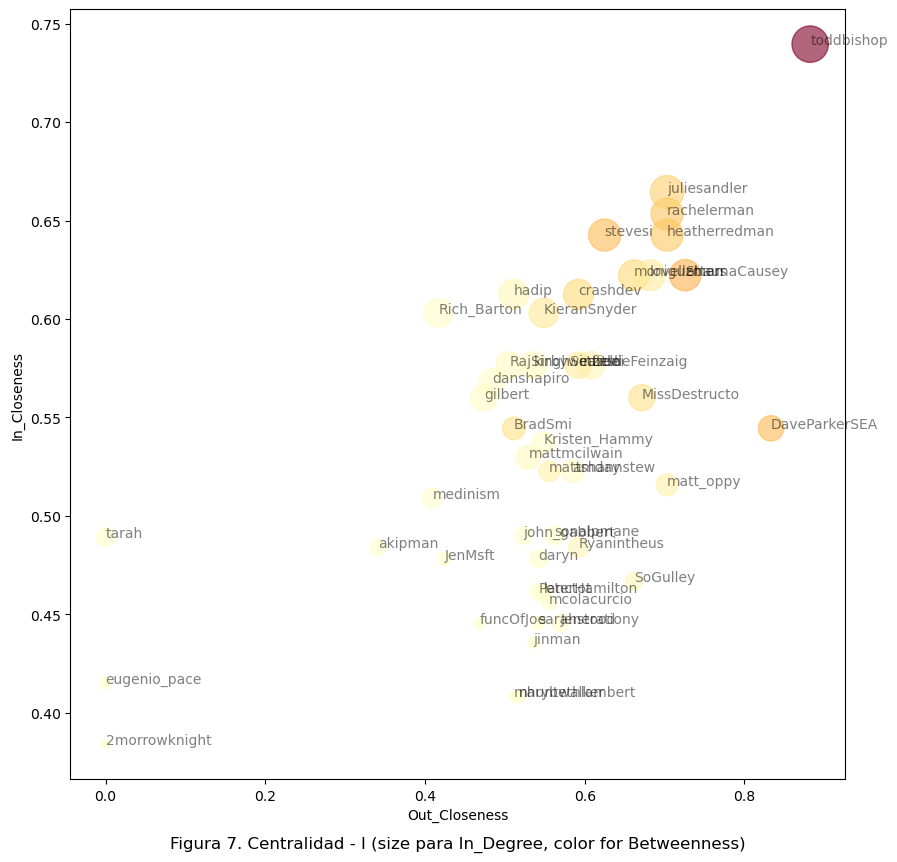

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.OutCloseness, actorMeasures.InCloseness,s=1000*actorMeasures.InDegree,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.OutCloseness,actorMeasures.InCloseness)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("Figura 7. Centralidad - I (size para In_Degree, color for Betweenness)", y=-0.1)
plt.xlabel("Out_Closeness")
plt.ylabel("In_Closeness")
plt.show()

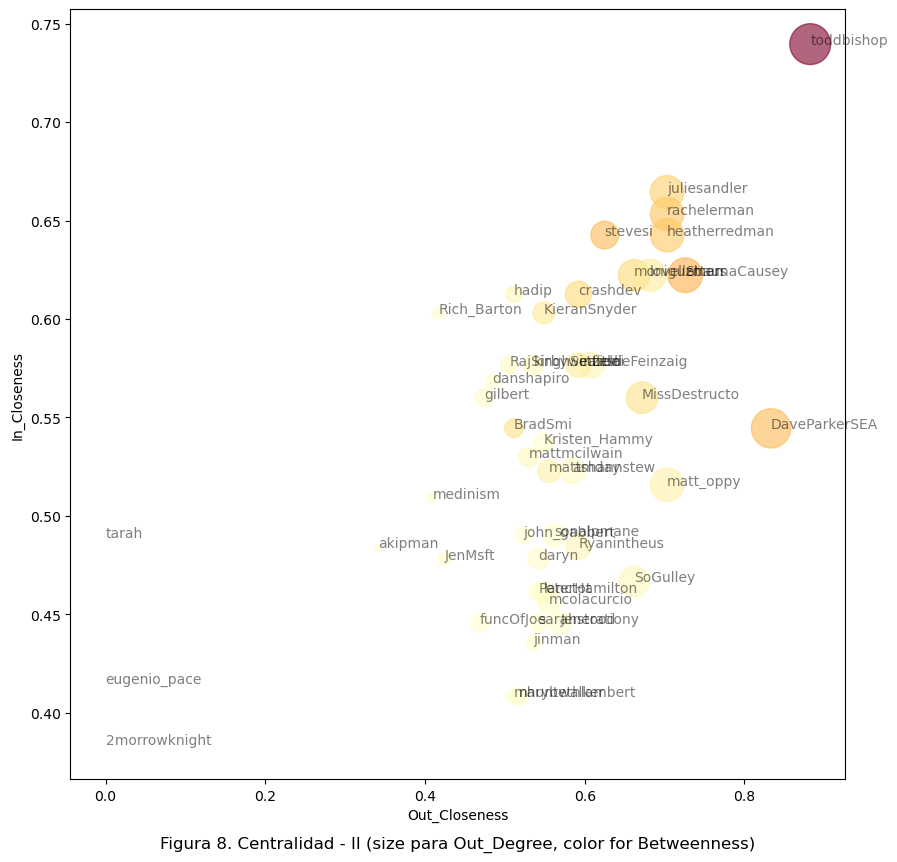

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.OutCloseness, actorMeasures.InCloseness,s=1000*actorMeasures.OutDegree,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.OutCloseness,actorMeasures.InCloseness)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("Figura 8. Centralidad - II (size para Out_Degree, color for Betweenness)", y=-0.1)
plt.xlabel("Out_Closeness")
plt.ylabel("In_Closeness")
plt.show()

# Practicando con UCINET

### Pasos previos en UCINET

Para comenzar, no olvide indicar que **data** es el folder por defecto. Abramos en UCINET la matriz de adyacencia como en la sesión anterior (usando el **Matrix Editor**):
 
 
<img src="https://i.imgur.com/5CcgRfx.png" width="800"/>

La matriz de adyacencia se abrirá en el editor. Guardela en el formato de UCINET:


<img src="https://i.imgur.com/5RIrcza.png" width="800"/>

A esta altura, ya debes tener un archivo de UCINET con esta red.


<img src="https://i.imgur.com/2lZCLEg.png" width="800"/>

###  Distancia y Geodesicos en UCINET

UCINET puede calcular la matriz de geodésicos desde el menú principal, seleccionando **Network** y **Dyadic Mesures**:

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/UCI_geodesMtx.png" style="width:70%">
<figcaption align = "center"> Figura 9. Ruta hacia la matriz de geodésicos en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

<div class="alert-success">

## Ejercicio 1

La Figura 10 le muestra el menú para calcular la matriz de geodésicos.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/UCI_geodesMtx_Ex1.png" style="width:70%">
<figcaption align = "center"> Figura 10. Menú para obtener matriz de geodésicos en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>
    
1. ¿Qué entiende de las opciones que se muestran en la parte inferior de la Figura 10? 
2. Si dejas las opciones de la Figura 10, ¿obtienes lo mismo que Python?
3. Proponga un ejemplo donde a mayor diámetro más perjudicial para la red.
4. Proponga un ejemplo donde a mayor diámetro más beneficioso para la red. 
5. Proponga un ejemplo donde a menor diámetro más beneficioso para la red.
6. Proponga un ejemplo donde a menor diámetro más perjudicial para la red.

_Prepara su respuesta con texto e imagenes de los obtenido en un GoogleDoc_.
</div>

###  Alcanzabilidad en UCINET

UCINET tiene la función para calcular la _Reachability Matrix_. La Figura 11 muestra la ruta:

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/UCI_ReachMtx.png" style="width:70%">
<figcaption align = "center"> Figura 11. Menú para obtener matriz de alcanzabilidad en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

<div class="alert-success">

## Ejercicio 2

Proceda a calcular la matriz de alcanzabilidad. Cuando aparezcan los resultados, responda:
    
¿UCINET la da la misma información que ya se calculó con Python, o es muy diferente? 

_Prepara su respuesta con texto e imagenes de los obtenido en un GoogleDoc_.
</div>

Para obtener los componentes fuertemente conectados en UCINET podemos seguir la ruta que indica la Figura 12.
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/uci_components_menu.png" style="width:70%">
<figcaption align = "center"> Figura 12. Menú para obtener componentes fuertemente conectados en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

Al usar esta configuración (note lo seleccionado en la Figura 13).

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/uci_components_actors_menu.png" style="width:70%">
<figcaption align = "center"> Figura 13. Cálculo de componentes fuertemente conectados en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

Usted obtendrá los componentes solicitados.

<div class="alert-success">

## Ejercicio 3

Al ver los resultados obtenidos luego de ejecutar el menú de la Figura 13, responda:
    
1. ¿UCINET muestra los nodos que tienen una reachability muy bajo? 
2. ¿Qué información adicional a la ya mostrada en Python sobre componentes fuertemente conectados le ofrece UCINET? Si hay algo adicional a lo visto en clase, describa y explique brevemente.

_Prepara su respuesta con texto e imagenes de los obtenido en un GoogleDoc_.
</div>

Para obtener la reciprocidad en UCINET podemos seguir la ruta que indica la Figura 14.
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/ucinet_recip.png" style="width:70%">
<figcaption align = "center"> Figura 14. Ruta para obtener la reciprocidad en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

A continuación, seleccione "arc-based" como indica la Figura 15.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/ucinet_recip_select.png" style="width:70%">
<figcaption align = "center"> Figura 14. Ruta para obtener la reciprocidad en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

<div class="alert-success">

## Ejercicio 4

Al ver los resultados obtenidos luego de ejecutar el menú de la Figura 14, responda:
    
1. ¿Qué diferencias encuentra entre lo que muestra UCINET y se calculó antes en Python? 
2. Investigue qué significa Dyad-based que le ofrece UCINET. 

_Prepara su respuesta con texto e imagenes de los obtenido en un GoogleDoc_.
</div>

###  Densidad en UCINET

Calcular la densidad en UCINET es muy sencillo, como se muestra en la Figura 15.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/uci_densi.png" style="width:70%">
<figcaption align = "center"> Figura 15. Ruta para obtener la densidad en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

<div class="alert-success">

## Ejercicio 5

Al ver los resultados obtenidos luego de ejecutar el menú de la Figura 15, responda:
    
¿Qué diferencias encuentra entre lo que muestra UCINET y se calculó antes en Python? 


_Prepara su respuesta con texto e imagenes de los obtenido en un GoogleDoc_.
</div>

###  Centralidad en UCINET

Calcular la centralidad de los nodos en UCINET es muy sencillo, como se muestra en la Figura 16.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/uci_centrality_menu.png" style="width:70%">
<figcaption align = "center"> Figura 16. Ruta para obtener la centralidad de cada nodo en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>

<div class="alert-success">

## Ejercicio 6

Luego del paso anterior, ejecute el menú de la Figura 17, seleccionando las TRES medidas indicadas.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/uci_centrality_exer.png" style="width:70%">
<figcaption align = "center"> Figura 17. Opciones para calcular la centralidad en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>
    
¿Qué diferencias encuentra entre lo que muestra UCINET y se calculó antes en Python? 

_Prepara su respuesta con texto e imagenes de los obtenido en un GoogleDoc_.
</div>